# SBC_pollution_China data analysis

This notebook has been generated on 2020-04-19 11:39 

The objective of this notebook is to YYY

## Analysis steps

The analysis steps performed in this notebook are the following

- Lorem ipsum dolor sit amet
- Lorem ipsum dolor sit amet
- Lorem ipsum dolor sit amet

## Data source 

The data source of this dataset is:

- [TFP_SBC_firm](HERE)

### Variable name

The variables names and labels are the following:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Variables</th>
      <th>Labels</th>
      <th>Types</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>id</td>
      <td>id</td>
      <td>object</td>
    </tr>
    <tr>
      <th>1</th>
      <td>OWNERSHIP</td>
      <td>OWNERSHIP</td>
      <td>object</td>
    </tr>
    <tr>
      <th>2</th>
      <td>year</td>
      <td>year</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>3</th>
      <td>geocode4_corr</td>
      <td>geocode4_corr</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>4</th>
      <td>industry</td>
      <td>industry</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>5</th>
      <td>occurence</td>
      <td>occurence</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>6</th>
      <td>tfp_OP</td>
      <td>tfp_OP</td>
      <td>float64</td>
    </tr>
    <tr>
      <th>7</th>
      <td>tfp_OWNERSHIP</td>
      <td>tfp_OWNERSHIP</td>
      <td>float64</td>
    </tr>
    <tr>
      <th>8</th>
      <td>polluted_thre</td>
      <td>polluted_thre</td>
      <td>object</td>
    </tr>
    <tr>
      <th>9</th>
      <td>cityen</td>
      <td>cityen</td>
      <td>object</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Coastal</td>
      <td>Coastal</td>
      <td>bool</td>
    </tr>
    <tr>
      <th>11</th>
      <td>TCZ_c</td>
      <td>TCZ_c</td>
      <td>object</td>
    </tr>
    <tr>
      <th>12</th>
      <td>target_c</td>
      <td>target_c</td>
      <td>float64</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Period</td>
      <td>Period</td>
      <td>object</td>
    </tr>
    <tr>
      <th>14</th>
      <td>FE_c_i</td>
      <td>FE_c_i</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>15</th>
      <td>FE_t_i</td>
      <td>FE_t_i</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>16</th>
      <td>FE_t_c</td>
      <td>FE_t_c</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>17</th>
      <td>FE_c_i_o</td>
      <td>FE_c_i_o</td>
      <td>int64</td>
    </tr>
    <tr>
      <th>18</th>
      <td>FE_t_o</td>
      <td>FE_t_o</td>
      <td>int64</td>
    </tr>
  </tbody>
</table>

# Analysis

In [1]:
import pandas as pd
import numpy as np
from Fast_connectCloud import connector
import plotly.express as px

In [2]:
import sys, os
sys.path.insert(0,'..')

In [3]:
import functions.latex_beautify as lb

%load_ext autoreload
%autoreload 2

In [4]:
options(warn=-1)
shhh <- suppressPackageStartupMessages
shhh(library(tidyverse))
shhh(library(lfe))
shhh(library(lazyeval))
shhh(library('progress'))

path = "../functions/SBC_pollution_R.R"
source(path)
path = "../functions/SBC_pollutiuon_golatex.R"
source(path)

In [5]:
gs = connector.open_connection(online_connection = False,
                              path_credential = '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth')

service = gs.connect_remote('GCP')

Service account storage and Bigquery are now connected. 
Service account storage is stored as <google.cloud.storage.client.Client object at 0xa28fece90> and accessible with "Storage_account" 
Service account Bigquery is stored as <google.cloud.bigquery.client.Client object at 0xa28fec5d0> and accessible with "bigquery_account"


## Load the data

It takes a will to upload the firm data, so we load it localy.

In [6]:
%put df_final --to R
from GoogleDrivePy.google_platform import connect_cloud_platform
project = 'valid-pagoda-132423'
gcp = connect_cloud_platform.connect_console(project = project, 
                                             service_account = service['GoogleCloudP'])    
#query = (
#          "SELECT * "
#            "FROM China.TFP_SBC_firm "

#        )

#df_final = gcp.upload_data_from_bigquery(query = query, location = 'US')
#df_final.head()
df_final = pd.read_csv('../01_TFP_SBC_firm.gz')    

INFO: NumExpr defaulting to 8 threads.

/Users/thomas/anaconda3/lib/python3.7/site-packages/pyarrow/feather.py:83: FutureWarning:

The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [7]:
#aggregation_param = 'industry'
aggregation_param = 'geocode4_corr'
list_agg = df_final[aggregation_param].to_list()
threshold_full = 6

In [8]:
%put aggregation_param --to R
%put threshold_full --to R

### Load chinese_city_characteristics from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

In [9]:
#from Fast_connectCloud import connector
#from GoogleDrivePy.google_drive import connect_drive
#import pandas as pd
#import numpy as np

#gs = connector.open_connection(online_connection = False, 
#	path_credential = '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth/')

#service_gd = gs.connect_remote(engine = 'GS')

#gdr = connect_drive.connect_drive(service_gd['GoogleDrive'])

In [10]:
%put df_chinese_city_characteristics --to R
df_chinese_city_characteristics = (df_final.merge(
    pd.read_csv('../df_chinese_city_characteristics.csv'),
    on = ['year','geocode4_corr']
).assign(
    threshold_tcz= 
                           lambda x: np.where(
                               x["gdp_cap"] > 28795,
                               1,0
                           ),
    threshold_concentrated= 
                           lambda x: np.where(
                               x["gdp_cap"] > 45396,
                               1,0
                           ),
    threshold_soe_output= 
                           lambda x: np.where(
                               x["gdp_cap"] > 30264,
                               1,0
                           ),
    threshold_soe_capital= 
                           lambda x: np.where(
                               x["gdp_cap"] > 24867,
                               1,0
                           ),
    threshold_soe_employment= 
                           lambda x: np.where(
                               x["gdp_cap"] > 35190,
                               1,0
                           )
)
                                  )
df_chinese_city_characteristics.shape

(641287, 31)

### Compute Herfhindal: proxy Size

$$
H=\sum_{i=1}^{N} s_{i}^{2}
$$

where $s_i$ is the market share of industry[city] $i$ in a city [industry], and $N$ is the number of firms. 

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city-industry: `market_share_cit`
- Step 2: compute the sum of squared market share by industry[city]: `Herfindahl_agg_t`
- Step 3: Compute the average across time: `Herfindahl_agg`
- Step 4: Compute the deciles of step 3: `decile_herfhindal_agg`
    - Low decile implies a low concentration within sectors
    - High decile implies a high concentration within sectors

In [11]:
query = """
WITH sum_cit AS (
  SELECT geocode4_corr, cic as industry, sum(output) as sum_o_cit, year
  FROM China.asif_firm_china 
  WHERE year >= 2002 AND year <= 2007
  AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY geocode4_corr, cic, year
) 
SELECT * 
FROM 
  (WITH sum_agg_t AS (
    SELECT {0}, SUM(sum_o_cit) as sum_o_agg_t, year
    FROM sum_cit
    WHERE year >= 2002 AND year <= 2007
    GROUP BY year, {0}
)
SELECT *
FROM
  (WITH ms_cit AS (
    SELECT  sum_cit.industry, sum_cit.geocode4_corr, sum_cit.year,
    sum_cit.sum_o_cit/NULLIF(sum_agg_t.sum_o_agg_t, 0) as market_share_cit
    FROM sum_cit
    LEFT JOIN sum_agg_t
ON (
sum_cit.year = sum_agg_t.year AND 
sum_cit.{0} = sum_agg_t.{0}
)
)
SELECT *
FROM
  (WITH agg_1 AS (
SELECT {0}, SUM(POW(market_share_cit, 2)) as Herfindahl_agg_t,
year
FROM ms_cit
GROUP BY year, {0}
ORDER BY year, {0} 
)
SELECT *
FROM (
SELECT {0},
AVG(Herfindahl_agg_t) as Herfindahl_agg
FROM agg_1
GROUP BY {0}
ORDER BY {0}
)

)))
"""
df_herfhindal = (gcp.upload_data_from_bigquery(
    query = query.format(aggregation_param),
                                         location = 'US')
                 .loc[lambda x: x[aggregation_param].isin(list_agg)]
                )

In [12]:
df_final.shape

(648797, 19)

### Create R tables

In [13]:
%put df_herfhindal_final --to R
df_herfhindal_final = (df_final.merge(df_herfhindal,
                                     on=[aggregation_param],
                                     how='left',
                                     indicator=True
                                     )
                       .assign(
                       decile_herfhindal = lambda x:
                           pd.qcut(x['Herfindahl_agg'],10, labels=False),
                       mean_herfhindal= 
                           lambda x: np.where(
                               x["Herfindahl_agg"] > 
                               x["Herfindahl_agg"].drop_duplicates().mean(),
                               1,0
                           ),
                       third_herfhindal= 
                           lambda x: np.where(
                               x["Herfindahl_agg"] >
                               (x["Herfindahl_agg"]
                                .drop_duplicates()
                                .quantile([.75])
                                .values[0]),
                               1,0
                           ),
                     threshold_herfhindal= 
                           lambda x: np.where(
                               x["decile_herfhindal"] > threshold_full,
                               1,0
                           )
                           
                       )
                      )
df_herfhindal_final.shape

(648797, 25)

In [14]:
df_herfhindal_final.head()

,id,OWNERSHIP,year,geocode4_corr,industry,occurence,tfp_OP,tfp_OWNERSHIP,polluted_thre,cityen,Coastal,TCZ_c,target_c,Period,FE_c_i,FE_t_i,FE_t_c,FE_c_i_o,FE_t_o,Herfindahl_agg,_merge,decile_herfhindal,mean_herfhindal,third_herfhindal,threshold_herfhindal
0,196670558,SOE,2002,4414,3329,1,-6.869049,-6.994576,Above,Meizhou,True,No_TCZ,0.02597,Before,0,0,0,0,0,0.11822,both,9,0,0,1
1,617924545,PRIVATE,2004,4414,3329,6,-5.985354,-6.034642,Above,Meizhou,True,No_TCZ,0.02597,Before,0,1,1,1,1,0.11822,both,9,0,0,1
2,617938939,SOE,2003,4414,3332,2,-4.376090,-4.466880,Below,Meizhou,True,No_TCZ,0.02597,Before,1,2,2,2,2,0.11822,both,9,0,0,1
3,617924545,PRIVATE,2003,4414,3332,6,-4.555978,-4.605596,Below,Meizhou,True,No_TCZ,0.02597,Before,1,2,2,3,3,0.11822,both,9,0,0,1
4,745544854,PRIVATE,2004,4414,3332,1,-5.408212,-5.441223,Below,Meizhou,True,No_TCZ,0.02597,Before,1,3,1,3,1,0.11822,both,9,0,0,1


In [15]:
df_final <- df_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [16]:
df_herfhindal_final <- df_herfhindal_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [17]:
df_chinese_city_characteristics <- df_chinese_city_characteristics %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

# Table TFP

$$
TFP _{fi k t}=\alpha\left(\text { Period } \times \text { Target }_{i} \times \text { Polluting sectors }_{k} \right)+\nu_{i}+\lambda_{t}+\phi_{k}+\epsilon_{i k t}
$$

1. Full sample
2. SOE dominated
3. TCZ vs No TCZ
4. Coastal vs No Coastal
3. Kuznet threshold
    - TCZ: 28795
    - Concentrated: 45396
    - SOE output: 30264
    - SOE Capital: 24867
    - SPE employment: 35190
   
## Test

For each category, proceed as follow:

1. Without Firm's FE

- Test 1
    - `target * polluted * period *ownership`
    - `target * polluted * period` FOR SOE
    - `target * polluted * period` FOR PRIVATE
    - FE: `cio + ct+ti+to` & `ci+ct+ti` 
- Test 2
    - Similar to test 1, but filter `TCZ/No TCZ`
- Test 3
    - `target * period *ownership`
    - `target * period` FOR SOE
    - `target * period` FOR PRIVATE
    - FE: `cio + to+tc` & `c+i+t`
- Test 4
    - Similar to test 3, but filter `TCZ/No TCZ`    

2. With Firm's FE

- Identical to `Without Firm's FE` but include `firm` fixed effect


In [18]:
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

logical(0)

### Without firm's fixed effect


In [19]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              FE_c_i_o + FE_t_c + FE_t_i +FE_t_o    
              | 0 |
             industry, data= df_to_filter 
           #%>% filter(occurence != 1
           #          ),
             ,exactDOF=TRUE)

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'
                                                    #&occurence != 1
                                                    ),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              FE_c_i + FE_t_c + FE_t_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'
                                                    #&occurence != 1
                                                    ),
             exactDOF=TRUE)

fe1 <- list(
    c("City-industry-ownership", "Yes", "No", "No"),
    c("City-industry", "No", "Yes", "Yes"),
    c("City-time", "Yes", "Yes", "Yes"),
    c("Industry-time", "Yes", "Yes", "Yes"),
    c("time-ownership", "Yes", "No", "No")
             )

name = paste0("table_",1,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [20]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * OWNERSHIP|
              FE_c_i_o + FE_t_o  + FE_t_c 
              | 0 |
             industry, data=df_to_filter
          #%>% filter( occurence != 1)
          )

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'
                                                    #&occurence != 1
                                                    ))

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'
                                                    #&occurence != 1
                                                    ))

fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("City-industry-ownership", "Yes", "No", "No"),
    c("City-time", "Yes", "No", "No"),
    c("time-ownership", "Yes", "No", "No"),
    c("City", "No", "Yes", "Yes"),
    c("Industry", "No", "Yes", "Yes"),
    c("time", "No", "Yes", "Yes")
             )

name = paste0("table_",2,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

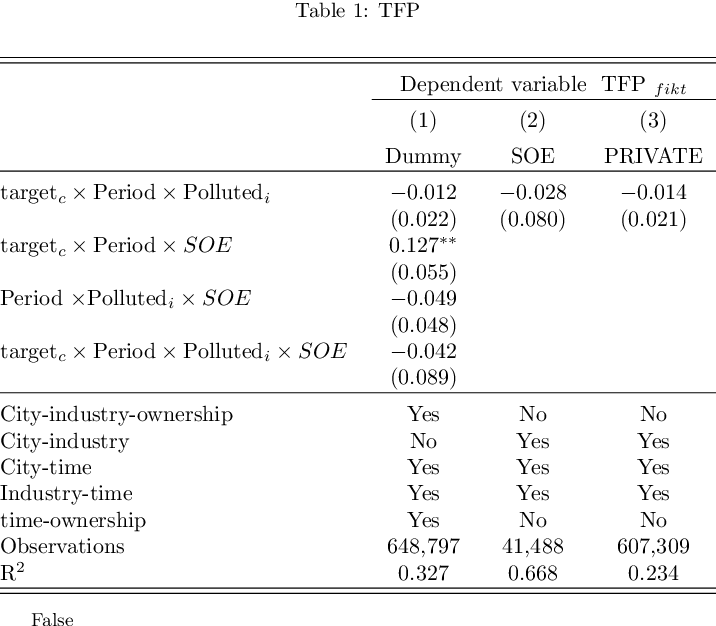

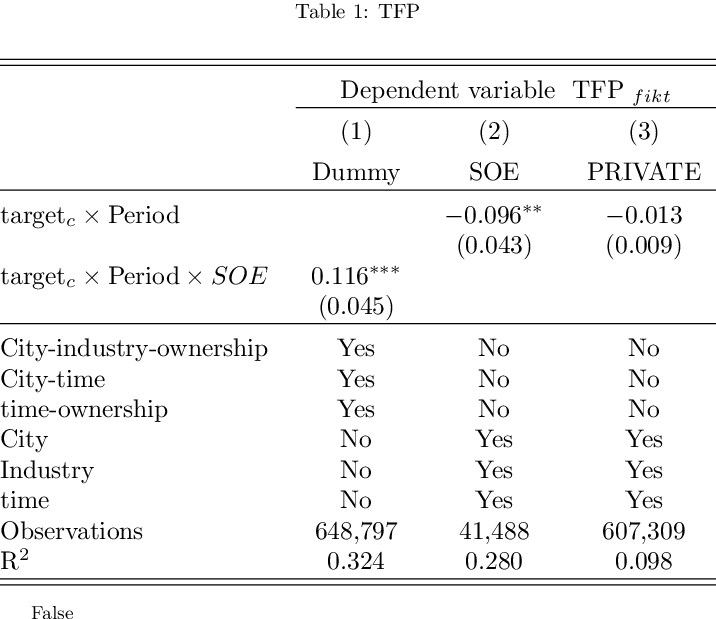

In [21]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

new_row = ['& Dummy', 'SOE', 'PRIVATE']

x = [a for a in os.listdir() if a.endswith(".txt")]
for i, val in enumerate(x):
    lb.beautify(table_number = i+1,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = None,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

Split

In [25]:
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

var_ <- 'threshold_herfhindal'
df_to_filter <- df_final

i = 1
fe1 <- list(
    c("City-industry-ownership", "Yes","Yes", "No", "No", "No", "No"),
    c("City-industry", "No","No", "Yes", "Yes", "Yes", "Yes"),
    c("City-time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry-time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("time-ownership", "Yes","Yes", "No", "No", "No", "No")
             )

for ( var in c("Coastal", "TCZ_c", var_,
               "threshold_tcz",
               "threshold_concentrated",
               "threshold_soe_output",
               "threshold_soe_capital",
               "threshold_soe_employment")){
    
    if (var == "Coastal"){
        filters <- TRUE  
        title_name = "Coastal"
    }else if (var == "TCZ_c"){
        filters <- "TCZ"   
        title_name = "TCZ"
    }else if (var == var_) {
        filters <- 1
        df_to_filter <- df_herfhindal_final
        title_name = "Herfhindhal"
    }else if ( 
              var == "threshold_tcz"|
              var == "threshold_concentrated"|
              var ==  "threshold_soe_output"|
              var ==  "threshold_soe_capital"|
              var ==  "threshold_soe_employment"){
        filters <- 1
        df_to_filter <- df_chinese_city_characteristics
        title_name <- str_extract(var, regex("[^_]+$"))
    }
    
    t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              FE_c_i_o + FE_t_c + FE_t_i +FE_t_o    
              | 0 |
             industry, data= df_to_filter %>% filter(get(var) == filters
                                                    #&occurence != 1
                                                    ),
             exactDOF=TRUE)
           
    t2 <- felm(formula= tfp_OP ~ 
               target_c  * Period * polluted_thre * OWNERSHIP|
                  FE_c_i_o + FE_t_c + FE_t_i +FE_t_o    
                  | 0 |
                 industry, data= df_to_filter %>% filter(get(var) != filters
                                                        #&occurence != 1
                                                        ),
                 exactDOF=TRUE)

    t3 <- felm(formula= tfp_OP ~ 
               target_c  * Period * polluted_thre |
                  FE_c_i + FE_t_c + FE_t_i
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) == filters & 
                     OWNERSHIP == 'SOE'
                 #&occurence != 1
                 ),
                 exactDOF=TRUE)

    t4 <- felm(formula= tfp_OP ~ 
               target_c  * Period * polluted_thre |
                  FE_c_i + FE_t_c + FE_t_i
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) != filters&
                     OWNERSHIP == 'SOE'
                 #&occurence != 1
                 ),
                 exactDOF=TRUE)

    t5 <- felm(formula= tfp_OP ~ 
               target_c  * Period * polluted_thre |
                  FE_c_i + FE_t_c + FE_t_i
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) == filters & 
                     OWNERSHIP != 'SOE'
                     #&occurence != 1
                 ),
                 exactDOF=TRUE)

    t6 <- felm(formula= tfp_OP ~ 
               target_c  * Period * polluted_thre |
                  FE_c_i + FE_t_c + FE_t_i
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) != filters & 
                     OWNERSHIP != 'SOE'
                 #&occurence != 1
                 ),
                 exactDOF=TRUE)

    name = paste0("table_",i,".txt")
    title = paste0("TFP subsample - ", title_name)
    tables <- list(t1, t2, t3, t4, t5, t6)
    table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)
    i = i+1
    print(title)
}

logical(0)

[1] "TFP subsample - Coastal"
[1] "TFP subsample - TCZ"
[1] "TFP subsample - Herfhindhal"
[1] "TFP subsample - tcz"
[1] "TFP subsample - concentrated"
[1] "TFP subsample - output"
[1] "TFP subsample - capital"
[1] "TFP subsample - employment"


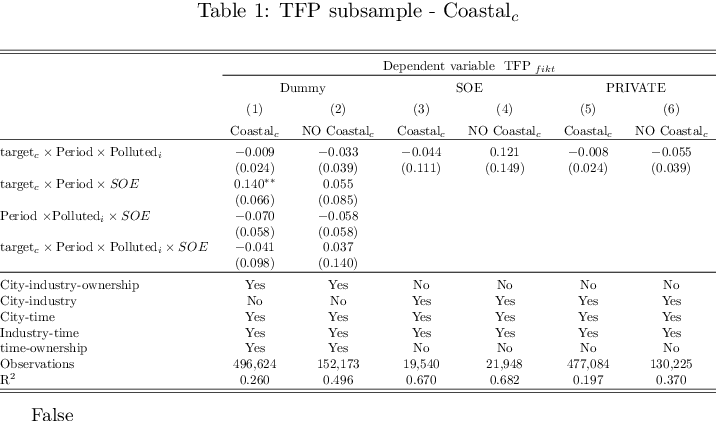

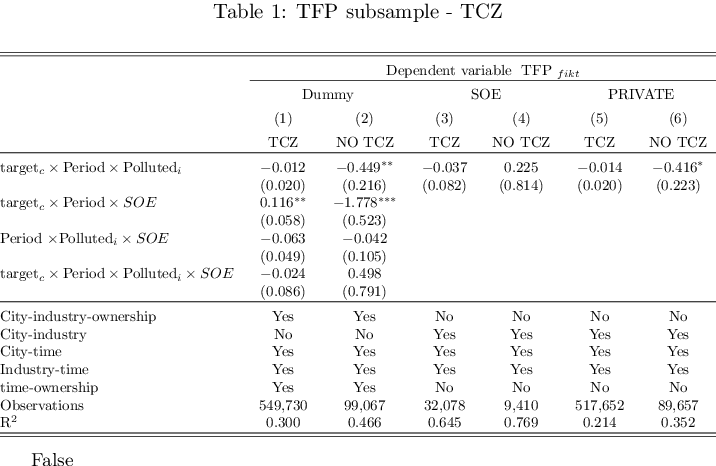

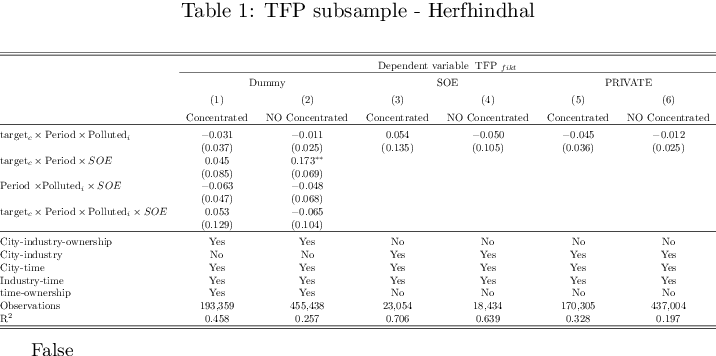

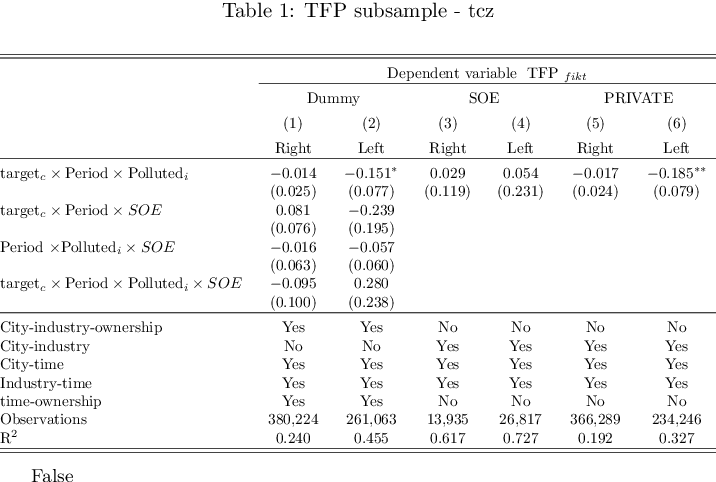

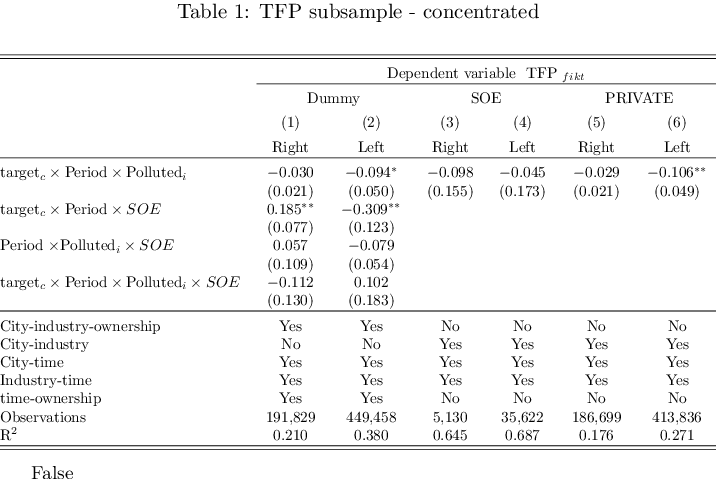

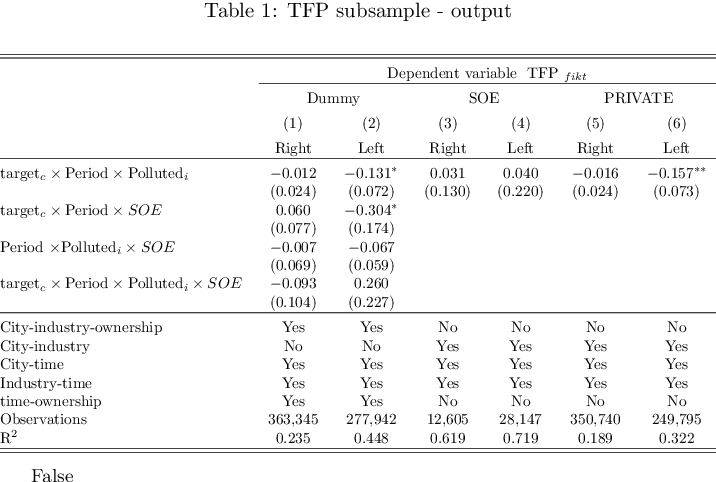

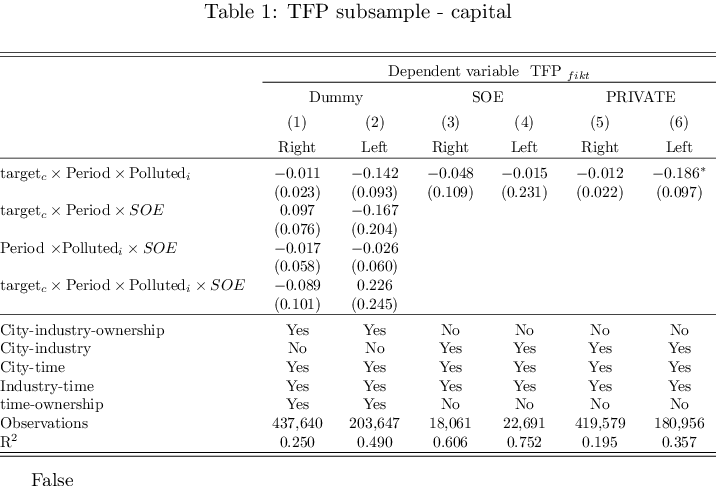

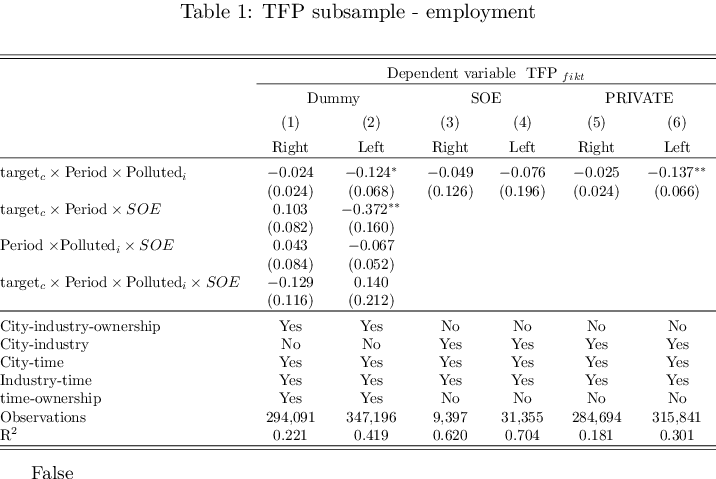

In [26]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = [
    ['& Coastal', 'NO Coastal',
     'Coastal', 'NO Coastal',
     'Coastal', 'NO Coastal']
          ,
    ['& TCZ', 'NO TCZ',
     'TCZ', 'NO TCZ',
     'TCZ', 'NO TCZ'],
    ['& Concentrated', 'NO Concentrated',
     'Concentrated', 'NO Concentrated',
     'Concentrated', 'NO Concentrated'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left']
          ]
           
x = [a for a in os.listdir() if a.endswith(".txt")]
for i, val in enumerate(x):
    lb.beautify(table_number = i+1,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row[i],
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

Without polluted

In [27]:
var_ <- 'threshold_herfhindal'
df_to_filter <- df_final

toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

i = 1
fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("City-industry-ownership", "Yes", "Yes", "No", "No", "No", "No"),
    c("City-time", "Yes","Yes", "No", "No", "No", "No"),
    c("time-ownership", "Yes","Yes", "No", "No", "No", "No"),
    c("City", "No","No",  "Yes", "Yes",  "Yes", "Yes"),
    c("Industry", "No","No",  "Yes", "Yes",  "Yes", "Yes"),
    c("time", "No", "No", "Yes", "Yes",  "Yes", "Yes")
             )

for ( var in c("Coastal", "TCZ_c", var_,
               "threshold_tcz",
               "threshold_concentrated",
               "threshold_soe_output",
               "threshold_soe_capital",
               "threshold_soe_employment")){
    
    if (var == "Coastal"){
        filters <- TRUE  
        title_name = "Coastal"
    }else if (var == "TCZ_c"){
        filters <- "TCZ"   
        title_name = "TCZ"
    }else if (var == var_) {
        filters <- 1
        df_to_filter <- df_herfhindal_final
        title_name = "Herfhindhal"
    }else if ( 
              var == "threshold_tcz"|
              var == "threshold_concentrated"|
              var ==  "threshold_soe_output"|
              var ==  "threshold_soe_capital"|
              var ==  "threshold_soe_employment"){
        filters <- 1
        df_to_filter <- df_chinese_city_characteristics
        title_name <- str_extract(var, regex("[^_]+$"))
    }
    
    t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period  * OWNERSHIP |
              FE_c_i_o + FE_t_o  + FE_t_c    
              | 0 |
             industry, data= df_to_filter %>% filter(get(var) == filters
                                                    #&occurence != 1
                                                    ),
             exactDOF=TRUE)
           
    t2 <- felm(formula= tfp_OP ~ 
               target_c  * Period  * OWNERSHIP|
              FE_c_i_o + FE_t_o  + FE_t_c    
                  | 0 |
                 industry, data= df_to_filter %>% filter(get(var) != filters
                                                        #&occurence != 1
                                                        ),
                 exactDOF=TRUE)

    t3 <- felm(formula= tfp_OP ~ 
               target_c  * Period  |
              cityen +  year + industry
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) == filters & 
                     OWNERSHIP == 'SOE'
                 #&occurence != 1
                 ),
                 exactDOF=TRUE)

    t4 <- felm(formula= tfp_OP ~ 
               target_c  * Period  |
              cityen +  year + industry
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) != filters&
                     OWNERSHIP == 'SOE'
                 #&occurence != 1
                 ),
                 exactDOF=TRUE)

    t5 <- felm(formula= tfp_OP ~ 
               target_c  * Period  |
              cityen +  year + industry
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) == filters & 
                     OWNERSHIP != 'SOE'
                     #&occurence != 1
                 ),
                 exactDOF=TRUE)

    t6 <- felm(formula= tfp_OP ~ 
               target_c  * Period  |
              cityen +  year + industry
                  | 0 |
                 industry, data= df_to_filter %>% filter(
                     get(var) != filters & 
                     OWNERSHIP != 'SOE'
                 #&occurence != 1
                 ),
                 exactDOF=TRUE)

    name = paste0("table_",i,".txt")
    title = paste0("TFP subsample - ", title_name)
    tables <- list(t1, t2, t3, t4, t5, t6)
    table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)
    i = i+1
    print(title)
}

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] "TFP subsample - Coastal"
[1] "TFP subsample - TCZ"
[1] "TFP subsample - Herfhindhal"
[1] "TFP subsample - tcz"
[1] "TFP subsample - concentrated"
[1] "TFP subsample - output"
[1] "TFP subsample - capital"
[1] "TFP subsample - employment"


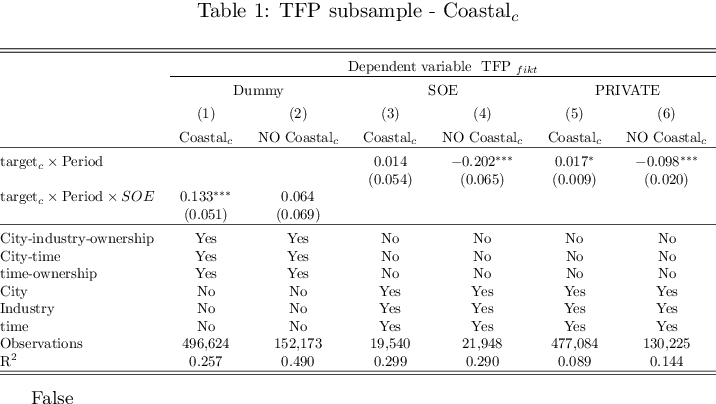

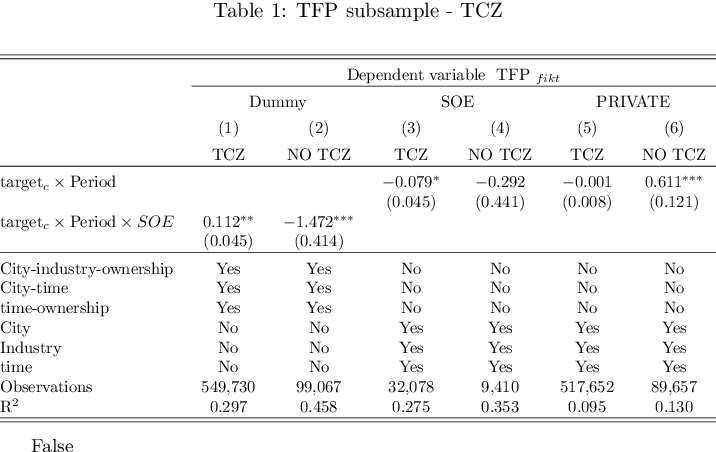

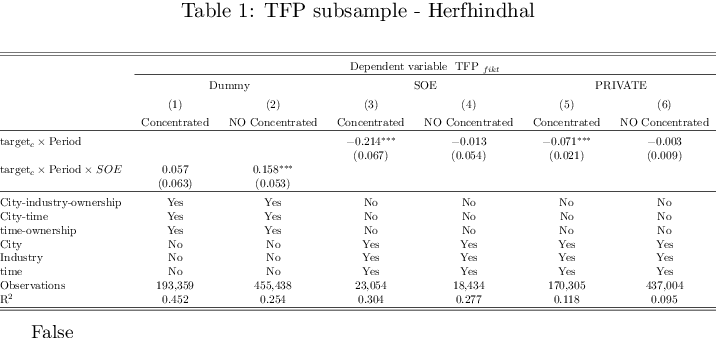

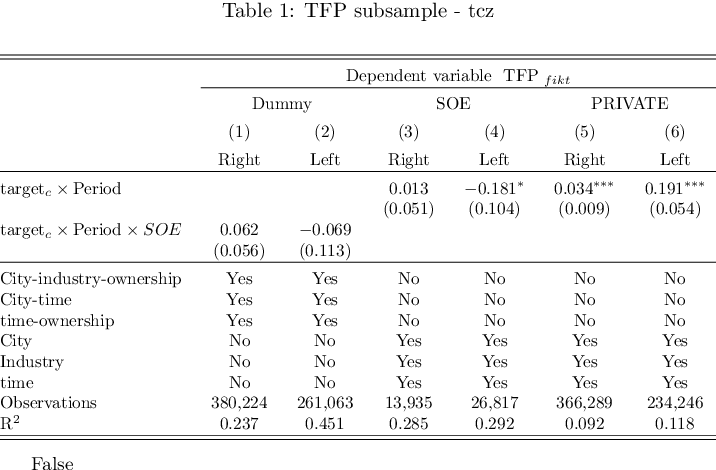

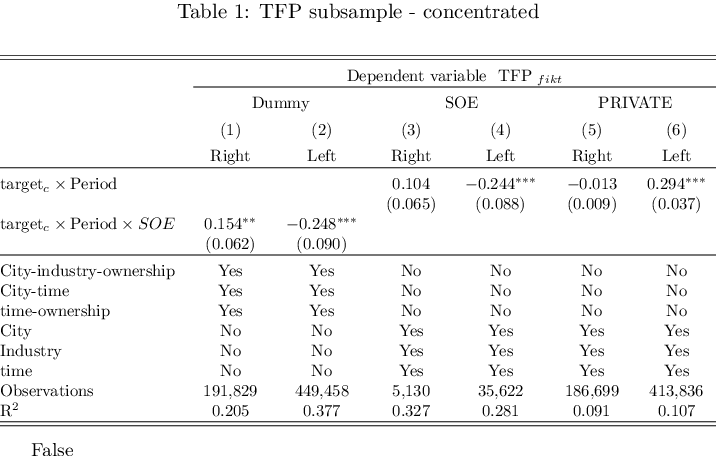

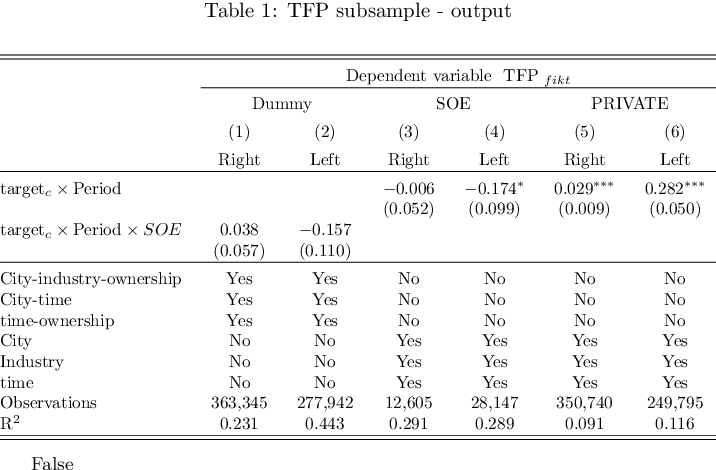

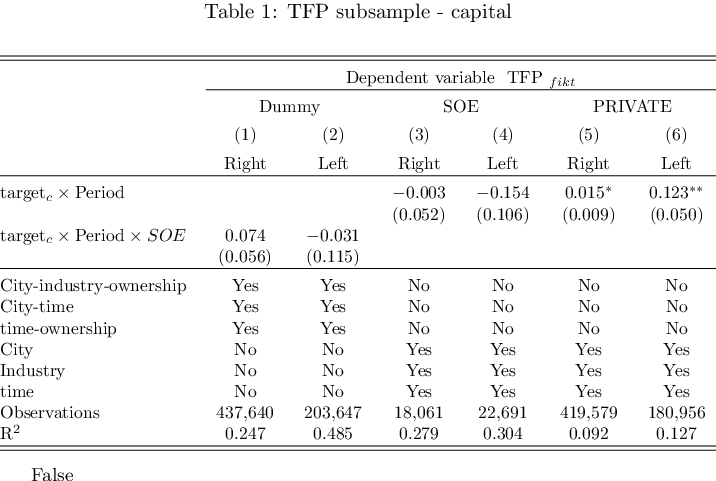

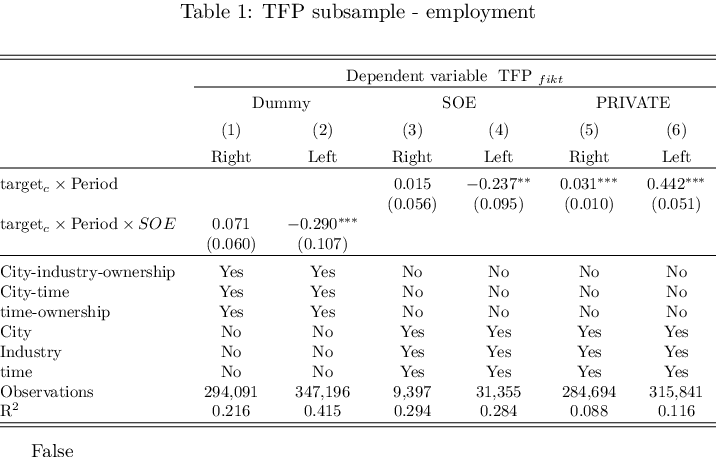

In [30]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = [
    ['& Coastal', 'NO Coastal',
     'Coastal', 'NO Coastal',
     'Coastal', 'NO Coastal']
          ,
    ['& TCZ', 'NO TCZ',
     'TCZ', 'NO TCZ',
     'TCZ', 'NO TCZ'],
    ['& Concentrated', 'NO Concentrated',
     'Concentrated', 'NO Concentrated',
     'Concentrated', 'NO Concentrated'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left'],
['& Right', 'Left',
     'Right', 'Left',
     'Right', 'Left']
          ]
           
x = [a for a in os.listdir() if a.endswith(".txt")]
for i, val in enumerate(x):
    lb.beautify(table_number = i+1,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row[i],
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

### With firm's fixed effect

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              id + FE_c_i_o + FE_t_o  + FE_t_c    
              | 0 |
             industry, data= df_to_filter
           %>% filter(occurence != 1)
           ,
             exactDOF=TRUE)

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'
                                                    &occurence != 1
                                                    ),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'
                                                    &occurence != 1
                                                    ),
             exactDOF=TRUE)

fe1 <- list(
    c("Firm", "Yes", "Yes", "Yes"),
    c("City-industry-ownership", "Yes", "No", "No"),
    c("time-ownership", "Yes", "No", "No"),
    c("City-industry", "No", "Yes", "Yes"),
    c("City-time","Yes", "Yes", "Yes"),
    c("time-industry", "No", "Yes", "Yes")
             )

name = paste0("table_",5,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

new_row = ['& Dummy', 'SOE', 'PRIVATE']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 5,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = None,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              id + FE_c_i_o + FE_t_o  + FE_t_c    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c == 'TCZ'
                                                    &occurence != 1
                                                    ),
             exactDOF=TRUE)
           
t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre * OWNERSHIP|
              id + FE_c_i_o + FE_t_o  + FE_t_c    
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c != 'TCZ'
                                                    &occurence != 1
                                                    ),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ' & 
                 OWNERSHIP == 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)
           
t4 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'&
                 OWNERSHIP == 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)

t5 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ'& 
                 OWNERSHIP != 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)
           
t6 <- felm(formula= tfp_OP ~ 
           target_c  * Period * polluted_thre |
              id + FE_t_c + FE_t_i + FE_c_i
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'& 
                 OWNERSHIP != 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)

fe1 <- list(
    c("Firm", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-industry-ownership", "Yes", "Yes", "Yes", "No", "No", "No"),
    c("time-ownership", "Yes", "Yes", "Yes", "No", "No", "No"),
    c("City-industry", "No", "No", "No", "Yes", "Yes", "Yes"),
    c("City-time", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("time-industry", "No", "No", "No", "Yes", "Yes", "Yes")
             )


name = paste0("table_",6,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3, t4, t5, t6)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = ['& TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 2,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period * OWNERSHIP|
              id +FE_c_i_o + FE_t_o  + FE_t_c
              | 0 |
             industry, data=df_to_filter
          %>% filter(occurence != 1)
          )

t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              id + cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP == 'SOE'
                                                    &occurence != 1
                                                    ))

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period|
              id+ cityen +  year + industry      
              | 0 |
             industry, data= df_to_filter %>% filter(OWNERSHIP != 'SOE'
                                                    &occurence != 1
                                                    ))

fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("Firm", "Yes", "Yes", "Yes"),
    c("City-industry", "Yes", "No", "No"),
    c("City-time", "Yes", "No", "No"),
    c("time-industry", "Yes", "No", "No"),
    c("City", "No", "Yes", "Yes"),
    c("Industry", "No", "Yes", "Yes"),
    c("time", "No", "Yes", "Yes")
             )

name = paste0("table_",7,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { TFP }_{fi k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
new_row = ['& Dummy', 'SOE', 'PRIVATE']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 7,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = None,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

In [ ]:
#toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
#file.remove(toremove)

df_to_filter <- df_final
t1 <- felm(formula= tfp_OP ~ 
           target_c  * Period  * OWNERSHIP|
              id + FE_c_i_o + FE_t_o  + FE_t_c
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c == 'TCZ'
                                                    &occurence != 1
                                                    ),
             exactDOF=TRUE)
           
t2 <- felm(formula= tfp_OP ~ 
           target_c  * Period  * OWNERSHIP|
              id + FE_c_i_o + FE_t_o  + FE_t_c   
              | 0 |
             industry, data= df_to_filter %>% filter(TCZ_c != 'TCZ'
                                                    &occurence != 1
                                                    ),
             exactDOF=TRUE)

t3 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ' & 
                 OWNERSHIP == 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)
           
t4 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'&
                 OWNERSHIP == 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)

t5 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
              id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c == 'TCZ'& 
                 OWNERSHIP != 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)
           
t6 <- felm(formula= tfp_OP ~ 
           target_c  * Period  |
             id+ cityen +  year + industry
              | 0 |
             industry, data= df_to_filter %>% filter(
                 TCZ_c != 'TCZ'& 
                 OWNERSHIP != 'SOE'
             &occurence != 1
             ),
             exactDOF=TRUE)

fe1 <- list( #FE_c_i_o + FE_t_o  + FE_t_c
    c("Firm", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("City-industry", "Yes", "Yes", "No", "No", "No", "No"),
    c("City-time", "Yes", "Yes","No", "No", "No", "No"),
    c("time-industry", "Yes","Yes", "No", "No", "No", "No"),
    c("City", "No","No", "Yes", "Yes", "Yes", "Yes"),
    c("Industry", "No","No", "Yes", "Yes", "Yes", "Yes"),
    c("time", "No","No", "Yes", "Yes", "Yes", "Yes")
             )

name = paste0("table_",8,".txt")
title = paste0("TFP ")
    
tables <- list(t1, t2, t3, t4, t5, t6)
table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=title,
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name=name)

In [ ]:
tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""

multicolumn = {
    'Dummy': 2,
    'SOE': 2,
    'PRIVATE': 2,
}

new_row = ['& TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ',
          'TCZ', 'NO TCZ']

#x = [a for a in os.listdir() if a.endswith(".txt")]
#for i, val in enumerate(x):
lb.beautify(table_number = 8,
            remove_control= False,
            constraint = True,
            city_industry = False, 
            new_row = new_row,
            multicolumn = multicolumn,
            table_nte =False,
            jupyter_preview = True,
            resolution = 150)

# Create Report

In [ ]:
import os, time, shutil
from pathlib import Path

export = 'html' #'pdf'

filename = '01_TFP_analysis'
source = filename + '.ipynb'
source_to_move = filename +'.{}'.format(export)
path = os.getcwd()
parent_path = str(Path(path).parent)
path_report = "{}/Reports".format(parent_path)
dest = os.path.join(path_report, filename)+'.{}'.format(
    export
)

os.system('jupyter nbconvert --no-input --to {} {}'.format(export, source))

time.sleep(5)
#shutil.move(source_to_move, dest)